# Evolução da longitude do nodo ascendente dos planetas do Sistema Solar
Foi realizada simulação a partir da data 01/01/2000 às 00h00min00s (JD 2451544.5), num intervalo de tempo de 100 milhões de anos

## Importando módulos

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os

## Configurando a função para plotar os gráficos

In [2]:
font = {'family' : 'sans-serif',
        'style'  : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
def plot_figure(planets, variable, title, ylabel, xmin = 0, xmax = 1e8):
    plt.figure(figsize = (14, 8))
    for planet, variable in zip(planets, variables):
        plt.plot(time, variable, label = planet)
    plt.title(title)
    plt.xlabel("t [yr]")
    plt.ylabel(ylabel)
    plt.xlim(xmin,xmax)
    plt.legend(loc = 1)
    plt.grid()
    plt.show()

## Lendo arquivos de dados

Lendo os dados a partir dos arquivos convertidos pelo notebook "Converter_binario_ascii.ipynb"

In [4]:
# change work directory
os.chdir("SolarSystem2_mvs-001/")

In [5]:
cabecalho = ["t","a","e","inc","capom","omega","capm","peri","apo","obar"]

In [6]:
# Create planets' dataframes
mercury = pd.read_fwf("mercury.out", names = cabecalho)
venus = pd.read_fwf("venus.out", names = cabecalho)
earth = pd.read_fwf("earth.out", names = cabecalho)
mars = pd.read_fwf("mars.out", names = cabecalho)
jupiter = pd.read_fwf("jupiter.out", names = cabecalho)
saturn = pd.read_fwf("saturn.out", names = cabecalho)
uranus = pd.read_fwf("uranus.out", names = cabecalho)
neptune = pd.read_fwf("neptune.out", names = cabecalho)

time = jupiter.t

### Criando uma nova coluna de dados com ângulos entre -180 e 180 graus

In [7]:
import numpy as np

def capom180(ang):
    return ang - 360 if ang > 180 else (long + 360 if ang < -180 else ang)

mercury["capom2"] = mercury["capom"].apply(capom180)
venus["capom2"] = venus["capom"].apply(capom180)
earth["capom2"] = earth["capom"].apply(capom180)
mars["capom2"] = mars["capom"].apply(capom180)
jupiter["capom2"] = jupiter["capom"].apply(capom180)
saturn["capom2"] = saturn["capom"].apply(capom180)
uranus["capom2"] = uranus["capom"].apply(capom180)
neptune["capom2"] = neptune["capom"].apply(capom180)

## Planetas gigantes: 100 000 000 anos

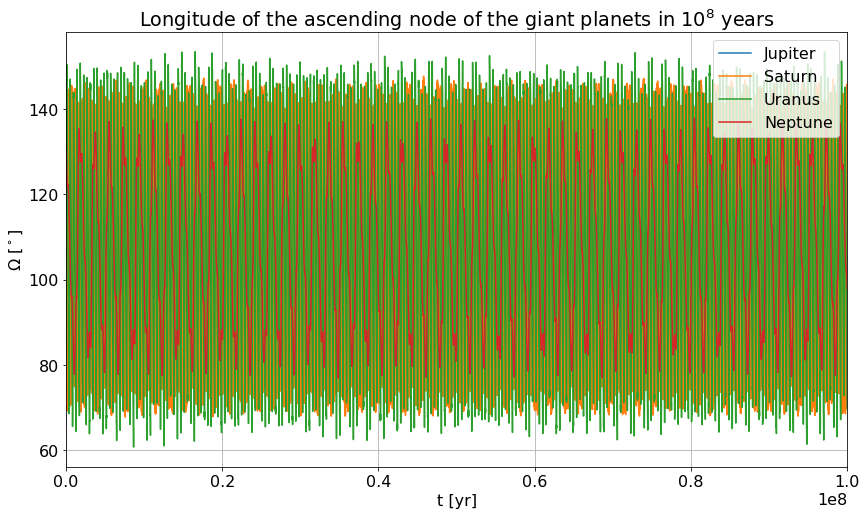

In [8]:
title = "Longitude of the ascending node of the giant planets in $10^8$ years"
planets = ["Jupiter", "Saturn", "Uranus", "Neptune"]
variables = [jupiter["capom"], saturn["capom"], uranus["capom"], neptune["capom"]]
xmin = 0
xmax = 1e8
ylabel = "$\Omega$ [$^\circ$]"

plot_figure(planets, variables, title, ylabel, xmin, xmax)

## Planetas gigantes: 10 000 000 anos

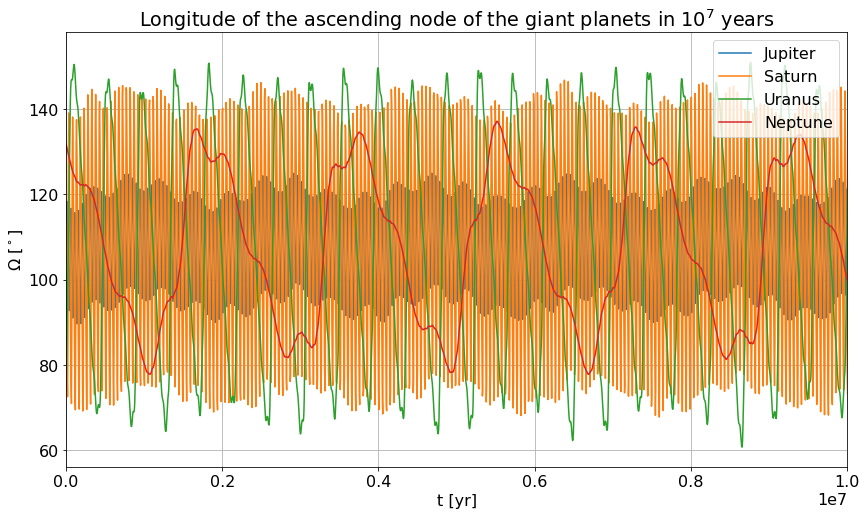

In [9]:
title = "Longitude of the ascending node of the giant planets in $10^7$ years"
planets = ["Jupiter", "Saturn", "Uranus", "Neptune"]
variables = [jupiter["capom"], saturn["capom"], uranus["capom"], neptune["capom"]]
xmin = 0
xmax = 1e7
ylabel = "$\Omega$ [$^\circ$]"

plot_figure(planets, variables, title, ylabel, xmin, xmax)

## Planetas gigantes: 400 000 anos

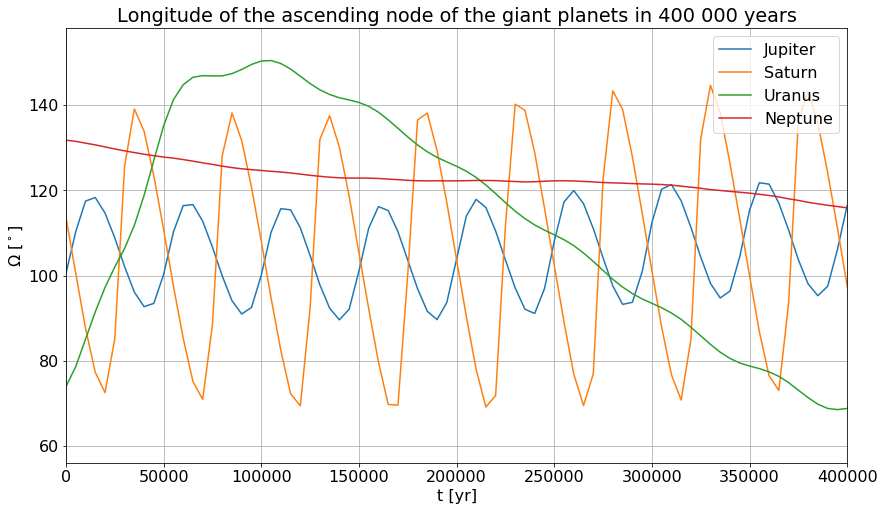

In [10]:
title = "Longitude of the ascending node of the giant planets in 400 000 years"
planets = ["Jupiter", "Saturn", "Uranus", "Neptune"]
variables = [jupiter["capom"], saturn["capom"], uranus["capom"], neptune["capom"]]
xmin = 0
xmax = 4e5
ylabel = "$\Omega$ [$^\circ$]"

plot_figure(planets, variables, title, ylabel, xmin, xmax)

## Planetas internos: 100 000 000 anos

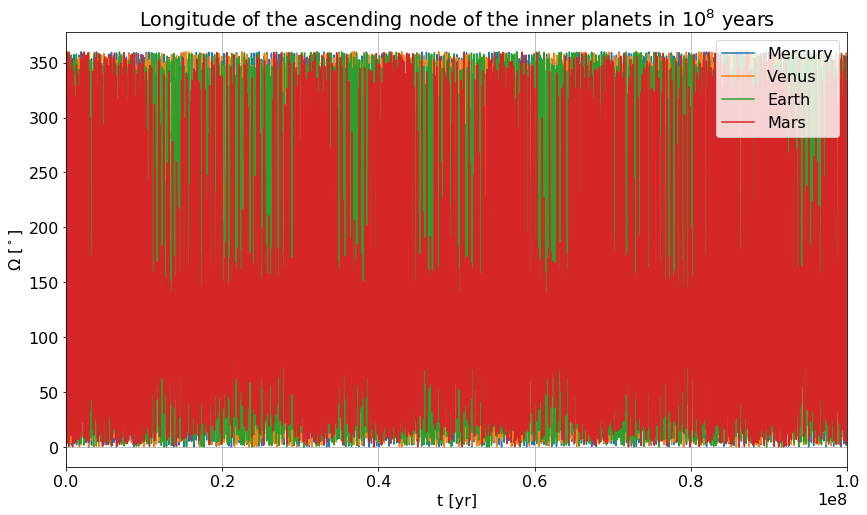

In [11]:
title = "Longitude of the ascending node of the inner planets in $10^8$ years"
planets = ["Mercury", "Venus", "Earth", "Mars"]
variables = [mercury["capom"], venus["capom"], earth["capom"], mars["capom"]]
xmin = 0
xmax = 1e8
ylabel = "$\Omega$ [$^\circ$]"

plot_figure(planets, variables, title, ylabel, xmin, xmax)

## Planetas internos: 10 000 000 anos

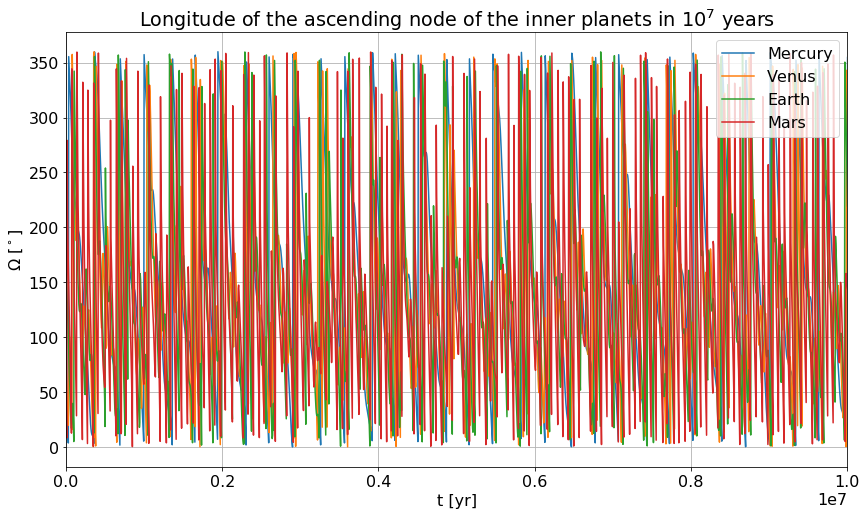

In [12]:
title = "Longitude of the ascending node of the inner planets in $10^7$ years"
planets = ["Mercury", "Venus", "Earth", "Mars"]
variables = [mercury["capom"], venus["capom"], earth["capom"], mars["capom"]]
xmin = 0
xmax = 1e7
ylabel = "$\Omega$ [$^\circ$]"

plot_figure(planets, variables, title, ylabel, xmin, xmax)

## Planetas internos: 400 000 anos

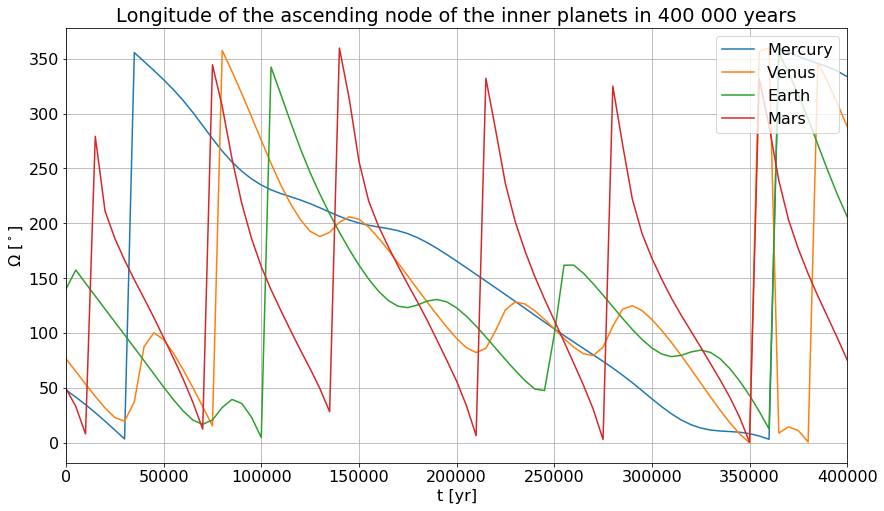

In [13]:
title = "Longitude of the ascending node of the inner planets in 400 000 years"
planets = ["Mercury", "Venus", "Earth", "Mars"]
variables = [mercury["capom"], venus["capom"], earth["capom"], mars["capom"]]
xmin = 0
xmax = 4e5
ylabel = "$\Omega$ [$^\circ$]"

plot_figure(planets, variables, title, ylabel, xmin, xmax)

## Diferença entre as longitudes dos nodos ascendentes

### Mercúrio e Vênus

$$\Omega_1 - \Omega_2$$
para um intervalo de 10 000 000 anos

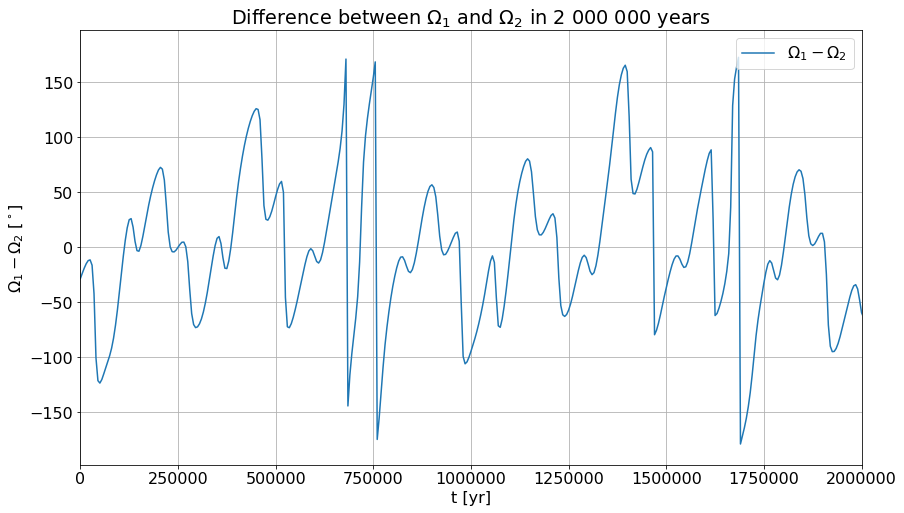

In [14]:
dif_capom = mercury.capom - venus.capom

#Procedimento que deixa o ângulo entre -180 e 180 graus.
list_int = np.array([np.rint(x) for x in (dif_capom/360)])
dif_ang = dif_capom - list_int * 360


# # #Procedimento que deixa o ângulo entre 0 e 360 graus
# list_int = np.array([int(x) for x in (dif_capom/360)])
# dif_ang = dif_capom - list_int * 360
# dif_ang[dif_ang < 0] = dif_ang + 360

title = "Difference between $\Omega_1$ and $\Omega_2$ in 2 000 000 years"
planets = ["$\Omega_1 - \Omega_2$"]
variables = [dif_ang]
xmin = 0
xmax = 2e6
ylabel = "$\Omega_1 - \Omega_2$ [$^\circ$]"

plot_figure(planets, variables, title, ylabel, xmin, xmax)

## Diferença entre as longitudes dos nodos ascendentes

### Mercúrio e Netuno

$$\Omega_1 - \Omega_7$$
para um intervalo de 10 000 000 anos

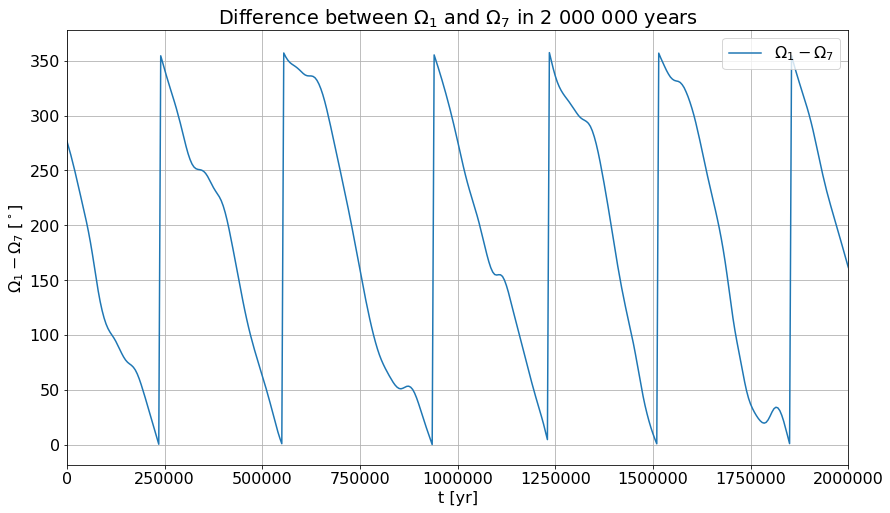

In [15]:
dif_capom = mercury.capom - neptune.capom

# #Procedimento que deixa o ângulo entre -180 e 180 graus.
# list_int = np.array([np.rint(x) for x in (dif_capom/360)])
# dif_ang = dif_capom - list_int * 360


# #Procedimento que deixa o ângulo entre 0 e 360 graus
list_int = np.array([int(x) for x in (dif_capom/360)])
dif_ang = dif_capom - list_int * 360
dif_ang[dif_ang < 0] = dif_ang + 360

title = "Difference between $\Omega_1$ and $\Omega_7$ in 2 000 000 years"
planets = ["$\Omega_1 - \Omega_7$"]
variables = [dif_ang]
xmin = 0
xmax = 2e6
ylabel = "$\Omega_1 - \Omega_7$ [$^\circ$]"

plot_figure(planets, variables, title, ylabel, xmin, xmax)

In [16]:
os.chdir("../")